In [1]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)


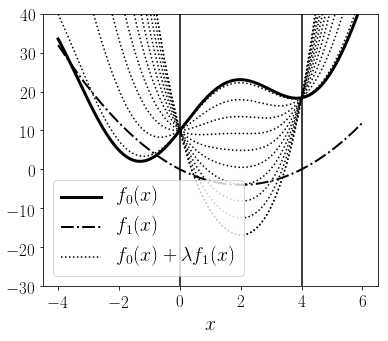

In [5]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import math
import numpy as np 
from matplotlib.backends.backend_pdf import PdfPages

import matplotlib.pyplot as plt

x = np.linspace(-4, 6, 1000)


def f0(x):
    return x**2 + 10*np.sin(x) + 10
def f1(x):
    return (x - 2)**2 - 4
def Lagrange(l, x):
    return x**2 + 10*np.sin(x) + 10 + l*((x - 2)**2 - 4)

y = f0(x)

z = f1(x)


fig = plt.figure(figsize=(6, 5)) 
plt.plot([-0, -0], [-50, 120], 'k-')
plt.plot([4, 4], [-50, 120], 'k-')
for l in np.linspace(0.2, 10, 10):
    y1 = y + l*z;
    plt.plot(x, y1, 'k:')


plt.plot(x, y, 'k-', linewidth = 3, label = '$f_0(x)$')
plt.plot(x, z, 'k-.', linewidth = 2, label = '$f_1(x)$')


plt.plot(x, y1, 'k:', label = '$f_0(x) + \lambda f_1(x)$')   
plt.ylim([-30, 40])
plt.legend(loc = "best", fontsize = 20)
plt.xlabel('$x$', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=17)
with PdfPages('dual_func.pdf') as pdf:
	pdf.savefig()  # saves the current figure into a pdf page 

plt.show()
plt.close()
    

9.999999546118707


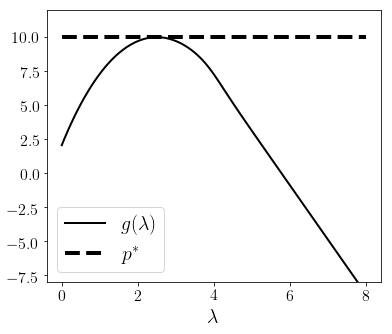

In [7]:
def grad(l, x):
    return 2*x + 10*np.cos(x)+2*l*(x-2)


def sol(l, x0, eta):
    max_iter = 1000;
    it = 0
    x = x0  
    while it < max_iter:
        it += 1 
        x -= eta*grad(l, x);
        if grad(l, x)**2 < 1e-12:
            break
    return x 

p = Lagrange(0, 0)

l = np.linspace(0, 8, 100);
yl = []
for i in range(len(l)):
    x0 = sol(l[i], 1, 0.001)
    yl.append(Lagrange(l[i], x0))
    
print(np.amax(yl))
   
fig = plt.figure(figsize=(6, 5)) 
plt.plot(l, yl, 'k', linewidth = 2, label = '$g(\lambda)$')
plt.plot([0, 8], [p, p], 'k--', linewidth = 4, label = '$p^*$')
plt.legend(loc = "best", fontsize = 20)
plt.ylim([-8, 12])
plt.xlabel('$\lambda$', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=16)

with PdfPages('dual_func2.pdf') as pdf:
    pdf.savefig() 

plt.show()    
plt.close()             